In [30]:
import numpy as np
import json
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.linalg import svds
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE

In [33]:
# def tokenize_transcript(transcripts):
# 	for idx, song in enumerate(transcripts):
# 		lyrics = song["lyrics"]
# 		lyrics = lyrics.replace("\\n", " ").replace("[Hook", " ").replace("[Verse", " ").replace("b", " ", 1)
# 		transcripts[idx]["lyrics"] = re.findall(r"[a-z]+", lyrics.lower())

# 	return transcripts

with open("songData.json", "r") as f:
	song_transcripts = json.load(f)


songs = list(song_transcripts.values())
# songs = tokenize_transcript(songs)
# print(songs[0])

In [41]:
vectorizer = TfidfVectorizer(stop_words = "english")
songlist = [song["lyrics"] for song in songs]
songlist.append("hello good morning how are you doing")
lyric_matrix = vectorizer.fit_transform(songlist).transpose()
print(lyric_matrix.shape)
u, s, v = svds(lyric_matrix, k=100)
words_compressed, _, docs_compressed = svds(lyric_matrix, k = 30)
docs_compressed = docs_compressed.transpose()


word_to_index = vectorizer.vocabulary_

index_to_word = {i:t for t,i, in word_to_index.items()}
words_compressed = normalize(words_compressed, axis =1)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1039: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


(75827, 4545)


[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 4545
[t-SNE] Computed conditional probabilities for sample 2000 / 4545
[t-SNE] Computed conditional probabilities for sample 3000 / 4545
[t-SNE] Computed conditional probabilities for sample 4000 / 4545
[t-SNE] Computed conditional probabilities for sample 4545 / 4545
[t-SNE] Mean sigma: 0.296520
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.656015
[t-SNE] Error after 300 iterations: 1.656015
(4545, 2)


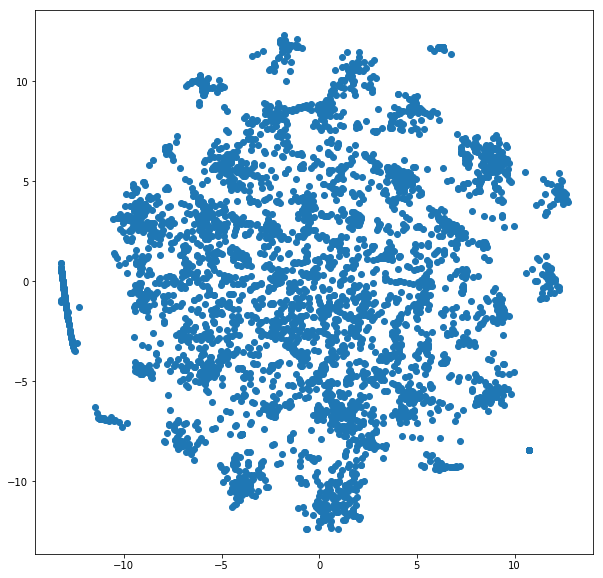

The Corner
Respiration:0.648
Black Zombie:0.630
Let Us Live:0.622
Silent Murder:0.615
The People:0.606
Capital Punishment:0.601
No Idea's Original:0.597
We're Not Alone:0.585
The Book Of Souls:0.580
Empire of the Clouds:0.577

Tears Of A Clown
Wild Wild Horses:0.727
The Storm:0.698
Summer song:0.690
The Cool:0.680
Kenji:0.670
Painting:0.654
Tennessee:0.646
Between the Lines:0.645
Matthew 25:0.644
Hotel California:0.632

Kick in the Door
Rap Game/Crack Game:0.666
Raw Hide:0.620
Losin' Weight:0.597
Protect Ya Neck (The Jump Off):0.593
When the Shit Goes Down:0.588
Takeover:0.582
Knuckleheadz:0.578
Right Thru Me:0.568
Country Shit:0.560
Just Don't Give a Fuck:0.556

Peter Piper
Encore:0.728
A Week Ago:0.649
Fall Back/Titty Fat:0.648
Last Call:0.636
Stay Up! (Viagra):0.609
Basket Case:0.591
El Chupa Nibre:0.579
Kenji:0.566
Hello/Goodbye (Uncool):0.562
I Did It My Way:0.561

Sekou Story
Angelz:0.728
Shakey Dog:0.669
Phone Tap:0.657
Small World:0.624
Shootouts:0.616
Undying Love:0.604
K-I-SS

In [40]:
tsne = TSNE(verbose=1)
projected_docs = tsne.fit_transform(docs_compressed)
print(projected_docs.shape)
plt.figure(figsize=(10,10))
plt.scatter(projected_docs[:,0], projected_docs[:,1])
plt.show()

docs_compressed = normalize(docs_compressed, axis=1)


def closest_songs(project_index_in, k=10):
	sims = docs_compressed.dot(docs_compressed[project_index_in,:])
	asort = np.argsort(-sims)[:k+1]
	return [(songs[i]["title"], sims[i]/sims[asort[0]]) for i in asort[1:]]

for i in range(10):
	print(songs[i]["title"])
	for title, score in closest_songs(i):
		print("{}:{:.3f}".format(title[:40], score))
	print()
    


In [39]:
print(closest_songs(4544))

[("I'm Good", 0.9747261628560318), ('The Good, The Bad, The Ugly', 0.942198567582559), ('Good Enough', 0.9020451385958617), ('Good to Go', 0.8632965672927044), ('Good Morning', 0.8590770470529556), ('Wave Ya Hand', 0.8266891382943279), ('August', 0.8251855361447534), ('Good Life', 0.8020069336243819), ('Swim Good', 0.791803517096288), ('Hello/Goodbye (Uncool)', 0.7803914837562975)]


In [21]:
query_matrix = vectorizer.fit_transform(["Hello", "good", "morning", "how", "are", "you", "doing", "today"]).transpose()
print(query_matrix.shape)
uq, sq, vq = svds(query_matrix, k=1)
q_compressed, _, qs_compressed = svds(query_matrix, k = 40)
qs_compressed = qs_compressed.transpose()
print(qs_compressed)

(5, 8)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1039: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


ValueError: k must be between 1 and the order of the square input matrix.